In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn

In [2]:
data = pd.read_csv("5wines0720.csv")

In [3]:
data.head(2)

,Unnamed: 0,SEL1-BN 430,RN8-BN 430,SEL1-PC 430,RN8-PC 430,SEL1-CC 430,RN8-CC 430,SEL1-BN 444,RN8-BN 444,SEL1-PC 444,RN8-PC 444,SEL1-CC 444,RN8-CC 444,SEL1-BN 560,RN8-BN 560,SEL1-PC 560,RN8-PC 560,SEL1-CC 560,RN8-CC 560
0,Beaujolais,0.0829,0.0823,0.4011,0.4234,0.8003,0.8233,0.0798,0.0802,0.3892,0.4116,0.7658,0.7876,0.2673,0.2699,0.2975,0.3121,0.0892,0.0919
1,Beaujolais,0.0817,0.0837,0.4054,0.4270,0.8135,0.8174,0.0782,0.0812,0.3941,0.4146,0.7784,0.7821,0.2698,0.2720,0.3025,0.3159,0.0908,0.0896


In [4]:
data.shape

(80, 19)

In [5]:
datanp = np.array(data.iloc[:, 1:])

In [6]:
target = np.array(data.iloc[:,0])

In [7]:
target_unique = np.unique(target)

In [8]:
target_unique

array(['Beaujolais', 'Cabernet', 'Merlot', 'Pinot Noir', 'Shiraz',
       'Zinfandel BS', 'Zinfandel BT', 'Zinfandel C', 'Zinfandel R',
       'Zinfandel SV'], dtype=object)

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()

In [11]:
target_num = le.fit_transform(target)

In [12]:
target_num_unique = np.unique(target_num)

In [13]:
target_num

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8,
       8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9])

In [14]:
target_num_unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
data.columns

Index(['Unnamed: 0', 'SEL1-BN 430', 'RN8-BN 430', 'SEL1-PC 430', 'RN8-PC 430',
       'SEL1-CC 430', 'RN8-CC 430', 'SEL1-BN 444', 'RN8-BN 444', 'SEL1-PC 444',
       'RN8-PC 444', 'SEL1-CC 444', 'RN8-CC 444', 'SEL1-BN 560', 'RN8-BN 560',
       'SEL1-PC 560', 'RN8-PC 560', 'SEL1-CC 560', 'RN8-CC 560'],
      dtype='object')

In [16]:
features = np.array(['SEL1-BN 430', 'RN8-BN 430', 'SEL1-PC 430', 'RN8-PC 430',
       'SEL1-CC 430', 'RN8-CC 430', 'SEL1-BN 444', 'RN8-BN 444', 'SEL1-PC 444',
       'RN8-PC 444', 'SEL1-CC 444', 'RN8-CC 444', 'SEL1-BN 560', 'RN8-BN 560',
       'SEL1-PC 560', 'RN8-PC 560', 'SEL1-CC 560', 'RN8-CC 560'])

In [17]:
features

array(['SEL1-BN 430', 'RN8-BN 430', 'SEL1-PC 430', 'RN8-PC 430',
       'SEL1-CC 430', 'RN8-CC 430', 'SEL1-BN 444', 'RN8-BN 444',
       'SEL1-PC 444', 'RN8-PC 444', 'SEL1-CC 444', 'RN8-CC 444',
       'SEL1-BN 560', 'RN8-BN 560', 'SEL1-PC 560', 'RN8-PC 560',
       'SEL1-CC 560', 'RN8-CC 560'], 
      dtype='<U11')

# Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_scaled = scaler.fit_transform(datanp)

In [21]:
X_scaled.shape

(80, 18)

In [22]:
target.shape

(80,)

## PCA (Scaled)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=5)

In [25]:
X_pca = pca.fit_transform(X_scaled)

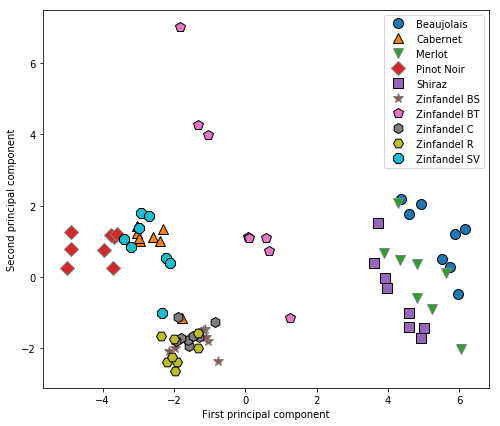

In [26]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 1], target)
plt.legend(target_unique, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

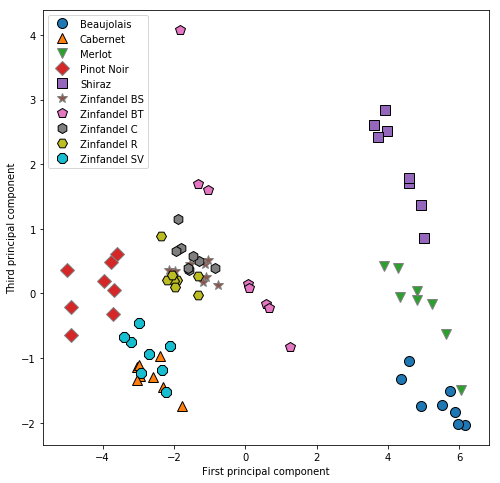

In [27]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Third principal component');

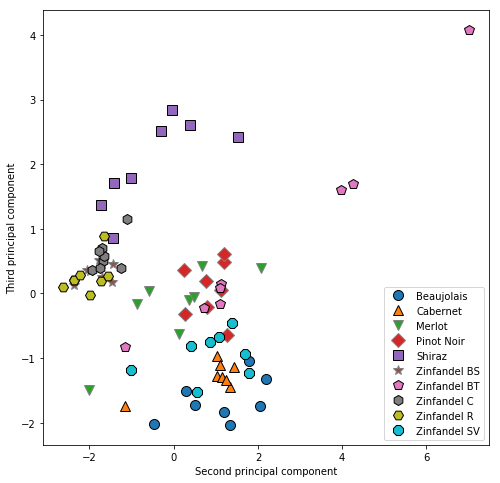

In [28]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,1], X_pca[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('Second principal component')
plt.ylabel('Third principal component');

In [29]:
pca.explained_variance_ratio_

array([ 0.63631096,  0.16585857,  0.07818067,  0.04753133,  0.0371062 ])

# PCA (not scaled)

In [30]:
pca = PCA(n_components=5)

In [31]:
X_pca = pca.fit_transform(datanp)

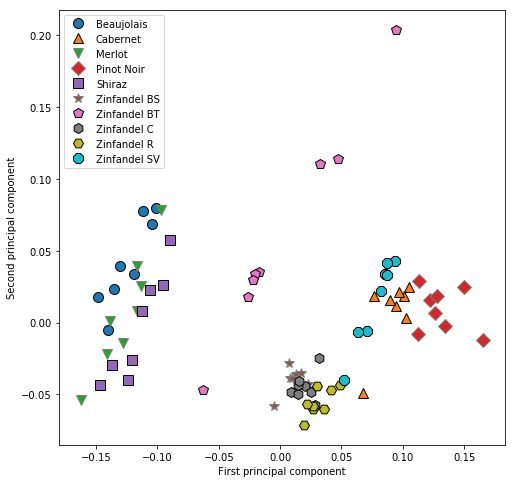

In [32]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 1], target)
plt.legend(target_unique, loc='upper left')
#plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

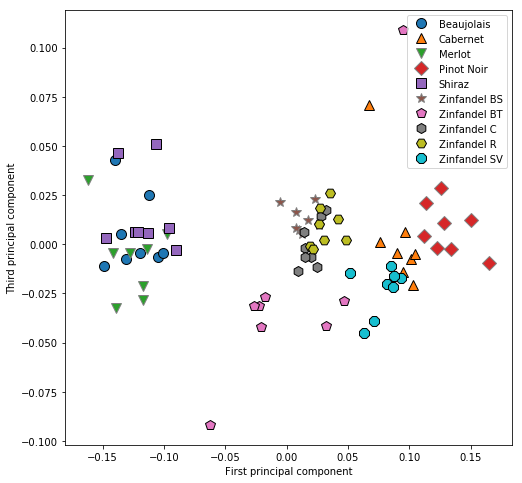

In [33]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Third principal component');

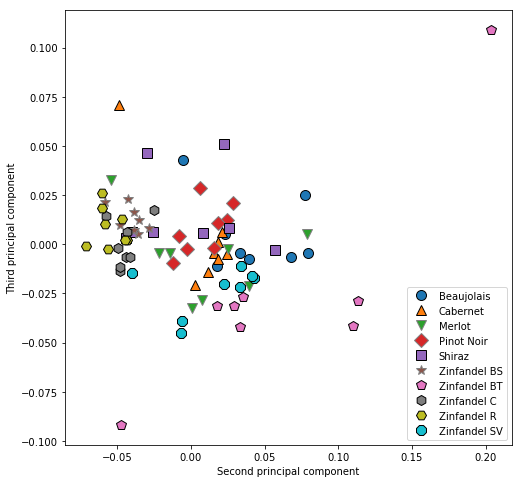

In [34]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,1], X_pca[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('Second principal component')
plt.ylabel('Third principal component');

In [35]:
pca.explained_variance_ratio_

array([ 0.70124122,  0.19661026,  0.05858957,  0.02087176,  0.01358011])

# Linear Discriminant Analysis

http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
lda = LinearDiscriminantAnalysis(n_components=5)
X_lda = lda.fit(datanp, target).transform(datanp)

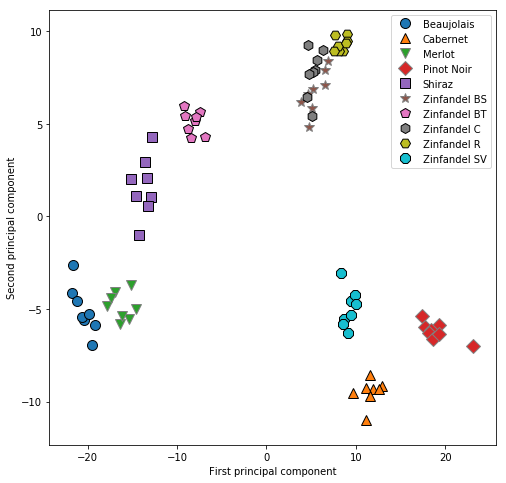

In [38]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_lda[:,0], X_lda[:, 1], target)
plt.legend(target_unique, loc='upper right')
#plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

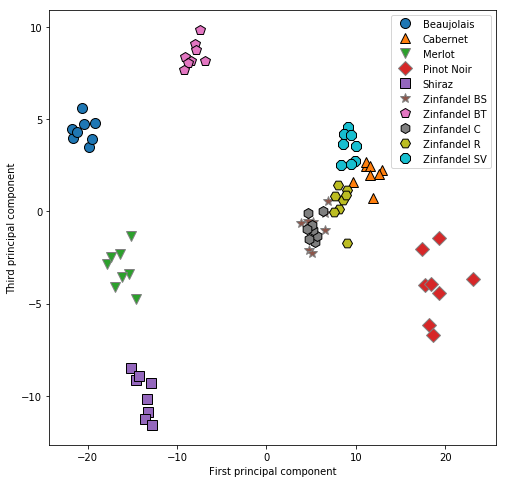

In [39]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_lda[:,0], X_lda[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Third principal component');

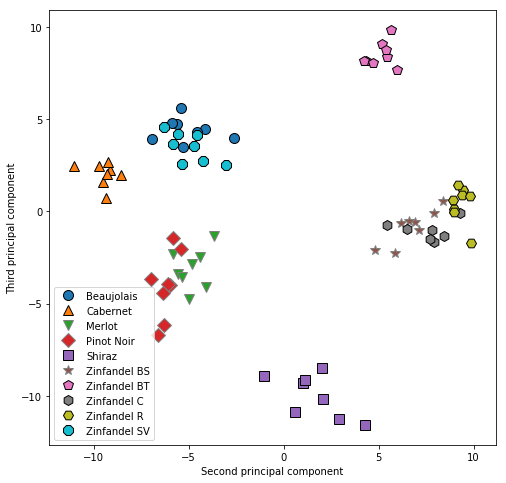

In [40]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_lda[:,1], X_lda[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('Second principal component')
plt.ylabel('Third principal component');

In [41]:
lda.classes_

array(['Beaujolais', 'Cabernet', 'Merlot', 'Pinot Noir', 'Shiraz',
       'Zinfandel BS', 'Zinfandel BT', 'Zinfandel C', 'Zinfandel R',
       'Zinfandel SV'], 
      dtype='<U12')

In [42]:
lda.coef_

array([[  4134.52957018,  -1379.61522244,   -417.53455077,  -2725.89110799,
            23.94169537,  10997.44291994,  -6647.10066385,   4504.82230495,
         -3876.30219084,   9780.94385347,   -244.10480999, -11084.765013  ,
          3679.62423053,   2418.17922127,   1178.58034474,  -9743.74788572,
           921.61009131,  -1068.52158037],
       [-11075.12433554,    921.99817971,  -1301.55909818,   1001.27264962,
          -753.43058261,  -1759.72783313,   -192.70598318,  -2426.17878249,
          2441.13410978,  -5493.59016842,   1506.63205987,   1787.14403058,
          5450.42461493,   -704.31678226,   1485.04063786,   5232.40468403,
         -1582.66119285,   -927.59064236],
       [  7761.70267775,   -795.39811524,  -1945.8050697 ,  -2968.24380207,
         -2386.36880679,   3938.74273952, -12626.12376361,   1622.05751462,
           403.89800061,   5971.97916364,   2234.89944689,  -4123.51497627,
          4838.54696215,   2529.91589312,   -956.86105162,  -5004.90080279,
  

In [43]:
lda.explained_variance_ratio_

array([ 0.67441055,  0.17307036,  0.09636779,  0.02159428,  0.01808395])

## LDA (scaled)

In [44]:
lda = LinearDiscriminantAnalysis(n_components=5)
X_lda = lda.fit(X_scaled, target).transform(X_scaled)

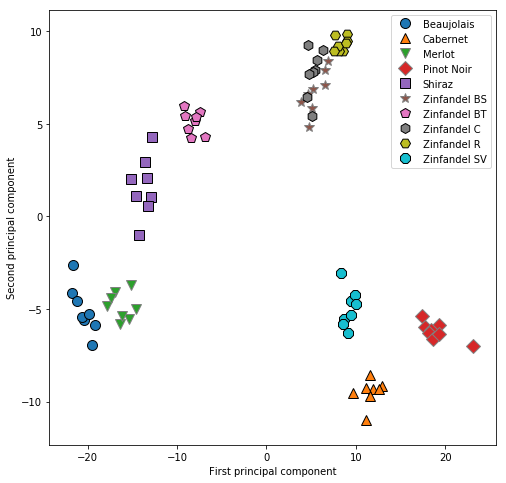

In [45]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_lda[:,0], X_lda[:, 1], target)
plt.legend(target_unique, loc='upper right')
#plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component');

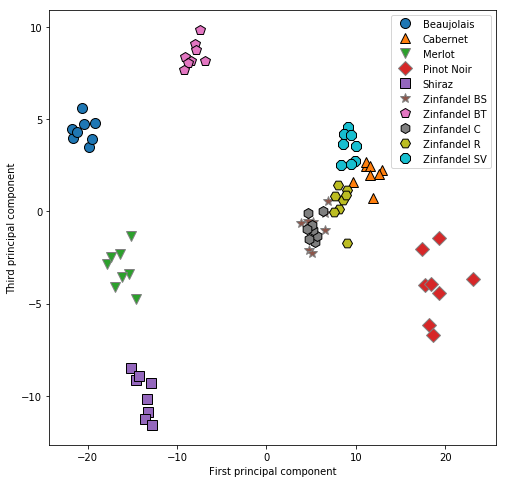

In [46]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_lda[:,0], X_lda[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Third principal component');

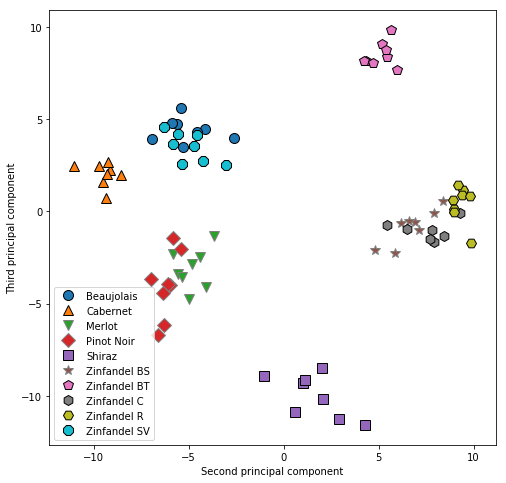

In [47]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_lda[:,1], X_lda[:, 2], target)
plt.legend(target_unique, loc='best')
#plt.gca().set_aspect('equal')
plt.xlabel('Second principal component')
plt.ylabel('Third principal component');

In [48]:
lda.explained_variance_ratio_

array([ 0.67441055,  0.17307036,  0.09636779,  0.02159428,  0.01808395])

### 3D plot

In [49]:
from mpl_toolkits.mplot3d import Axes3D

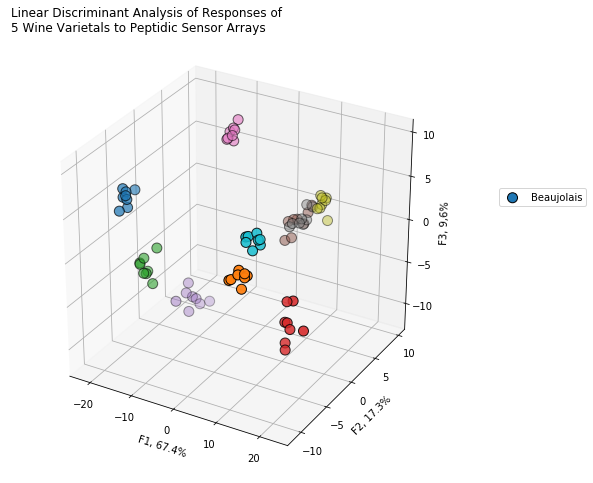

In [66]:
fig = plt.figure(figsize=(8,8), edgecolor='black')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_lda[:,0], X_lda[:,1], X_lda[:,2], c=target_num, s=100, edgecolors='black', cmap='tab10')
ax.set_xlabel('F1, 67.4%')
ax.set_ylabel('F2, 17.3%')
ax.set_zlabel('F3, 9,6%')
ax.set_title("Linear Discriminant Analysis of Responses of \n5 Wine Varietals to Peptidic Sensor Arrays", loc='left')
ax.legend(target_unique, loc='lower right', bbox_to_anchor=(1.3,0.6))
plt.show()

### From scratch

In [52]:
import matplotlib as mpl

In [53]:
current_cycler = mpl.rcParams['axes.prop_cycle']

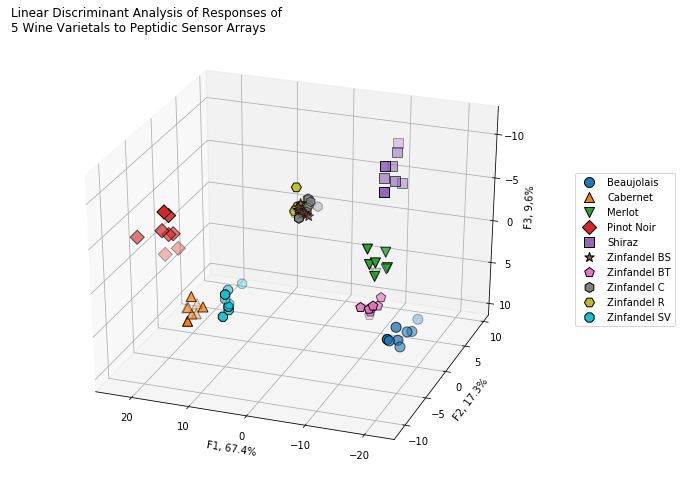

In [100]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.view_init(azim=70, elev=-150)
markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>']
row=0
num = 8
for i, (label, color_) in enumerate(zip(np.unique(target), current_cycler())):
    ax.scatter(X_lda[row:row+num,0], X_lda[row:row+num,1], X_lda[row:row+num,2], s=100, 
               color=color_['color'], label=label, edgecolors='black', marker=markers[i])
    row+=num
    
plt.legend(bbox_to_anchor=(1.2,0.7))
ax.set_xlabel('F1, 67.4%')
ax.set_ylabel('F2, 17.3%')
ax.set_zlabel('F3, 9,6%')
ax.set_title("Linear Discriminant Analysis of Responses of \n5 Wine Varietals to Peptidic Sensor Arrays", loc='left')
ax.view_init(azim=70, elev=-150)
plt.show()